![](data/venn_ml.png)

![](data/ext_sklearn.jpeg)

![](data/sklearn.png)

# WorkFlow
+ Definir objetivo
+ Obtener datos
+ Limpieza de datos (unidades, outliers, one-hot, etc..)
+ Definir modelo (regresión, clasificación, ...)
+ Entrenar (hiperparámetros, validación, ...) (**)
+ Predecir (testear)
+ Evaluar
+ Si hay mucho error volver a (**)

In [1]:
#Regresion
#En el analisis de regresion se esta buscando un numero, que puede tomar cualquier valor.
#Para dicho analisis tenemos diferentes formas de evaluar nuestro modelo por ejemplo:


#R-score; nos dira que tan explicativas son nuestras variables INDEPENDIENTES con nuestra variable(s) dependientes
#Entre mejor sea se acercara mas a 1, sin emebargo al tener un 1 exacto significa que nuestras viariables ind son
#exactamente iguales a nuestra variable dependiente, es decir tenemos un overfiting

#Por debajo del 0.50 tenemos un modelo que no explica de manera correcta a nuestra variable dependiente



In [2]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline        

#librerias estandard
import numpy as np
import pandas as pd 


#Herramienta para dividir nuestro dataset
from sklearn.model_selection import train_test_split as tts


#Modelos de regresion en sklearn

from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

#Importando viz

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Cargando informacion

def read_info(nombre):
    '''cargando informacion'''
    data = pd.read_csv('data/{}.csv'.format(nombre))
    print(data.info())
    
    return data
    

In [4]:
df_bike = read_info('bikes_rent')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB
None


In [5]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [6]:
df_bike.dtypes

season              int64
yr                  int64
mnth                int64
holiday             int64
weekday             int64
workingday          int64
weathersit          int64
temp              float64
atemp             float64
hum               float64
windspeed(mph)    float64
windspeed(ms)     float64
cnt                 int64
dtype: object

In [7]:
for i in df_bike.columns:
    print(i, df_bike[i].unique())

season [1 2 3 4]
yr [0 1]
mnth [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday [0 1]
weekday [6 0 1 2 3 4 5]
workingday [0 1]
weathersit [2 1 3]
temp [14.110847  14.902598   8.050924   8.2        9.305237   8.378268
  8.057402   6.765      5.671653   6.184153   6.932731   7.081807
  6.59567    9.566653   9.498347   7.209153   8.883347  11.979134
 10.728347   7.2775     2.4243464  3.9573897  3.9930433  9.162598
  8.9175     7.995      8.342598   8.877402   7.414153   7.879134
 10.66       7.665237   8.663464  11.719153  11.138347   9.054153
  5.526103   5.918268   7.752731   9.1225    12.977402  17.015
 10.909567  13.048701  17.869153  21.388347  16.365847  11.693897
 12.436653   7.471102   9.091299  12.121732  14.938268  11.5825
 14.082598  16.698193  10.933347  13.735      8.131653  15.750847
 15.437402  10.731299  11.9925    12.129153  15.952731  13.495847
 15.758268  13.333897  13.013031  14.973897  22.14      19.3725
 13.6325    17.647835  18.108347  14.225237  11.685     10.830847
 

In [8]:
def drop_c(df,*columns):
    df.drop(*columns,axis = 1, inplace = True)
    return df

In [9]:
df_bike_c = drop_c(df_bike,['yr','weathersit'])

In [10]:
df_bike_c.isna().sum()

season            0
mnth              0
holiday           0
weekday           0
workingday        0
temp              0
atemp             0
hum               0
windspeed(mph)    0
windspeed(ms)     0
cnt               0
dtype: int64

In [11]:
df_bike_c.describe()

,season,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,0.028728,2.997264,0.683995,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,3.451913,0.167155,2.004787,0.465233,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,26.872077,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


In [12]:
df_bike_c[['windspeed(mph)', 'windspeed(ms)']]

,windspeed(mph),windspeed(ms)
0,10.749882,4.805490
1,16.652113,7.443949
2,16.636703,7.437060
3,10.739832,4.800998
4,12.522300,5.597810
...,...,...
726,23.458911,10.486773
727,10.416557,4.656485
728,8.333661,3.725374
729,23.500518,10.505372


In [13]:
df_bike_c['windspeed(kph)'] = df_bike_c['windspeed(mph)']*1.609

In [14]:
df_bike_c = drop_c(df_bike_c,['windspeed(mph)', 'windspeed(ms)'])

In [15]:
df_bike_corr = df_bike_c.corr() #matriz de correlaciones

In [16]:
mask = np.triu(np.ones_like(df_bike_corr, dtype=np.bool))


<AxesSubplot:>

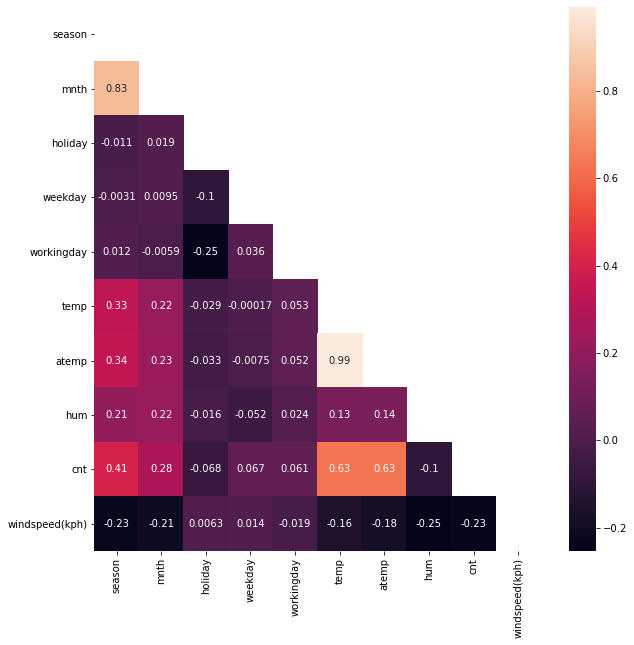

In [17]:
fig , ax = plt.subplots(figsize = (10,10))

sns.heatmap(df_bike_corr, annot = True, mask = mask)

In [18]:
df_bikes_chida = drop_c(df_bike_c,['atemp'])

In [19]:
df_bikes_chida.head()

,season,mnth,holiday,weekday,workingday,temp,hum,cnt,windspeed(kph)
0,1,1,0,6,0,14.110847,80.5833,985,17.296560
1,1,1,0,0,0,14.902598,69.6087,801,26.793250
2,1,1,0,1,1,8.050924,43.7273,1349,26.768455
3,1,1,0,2,1,8.200000,59.0435,1562,17.280390
4,1,1,0,3,1,9.305237,43.6957,1600,20.148381


In [20]:
cols = df_bikes_chida[['hum','temp','windspeed(kph)']]
cols

,hum,temp,windspeed(kph)
0,80.5833,14.110847,17.296560
1,69.6087,14.902598,26.793250
2,43.7273,8.050924,26.768455
3,59.0435,8.200000,17.280390
4,43.6957,9.305237,20.148381
...,...,...,...
726,65.2917,10.420847,37.745388
727,59.0000,10.386653,16.760240
728,75.2917,10.386653,13.408861
729,48.3333,10.489153,37.812333


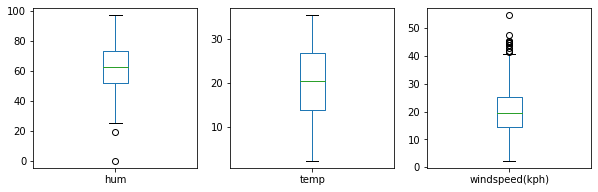

In [21]:
plt.figure(figsize=(10,10))
for i in range(len(cols.columns)):
    plt.subplot(3,3,i+1)
    cols[cols.columns[i]].plot(kind='box')


In [22]:
def drop_outl(low_q,high_q,df,*cols):
    new_df = df.copy()
    for i in cols[0]:
        upper = new_df[i].quantile(high_q)
        lower = new_df[i].quantile(low_q)
        new_df = new_df[(new_df[i]<=upper)&(new_df[i]>=lower)]
    
    return new_df

df_bike_no_out = drop_outl(0.02,0.98,df_bikes_chida,['hum','windspeed(kph)'])


In [23]:
df_bike_no_out

,season,mnth,holiday,weekday,workingday,temp,hum,cnt,windspeed(kph)
0,1,1,0,6,0,14.110847,80.5833,985,17.296560
1,1,1,0,0,0,14.902598,69.6087,801,26.793250
2,1,1,0,1,1,8.050924,43.7273,1349,26.768455
3,1,1,0,2,1,8.200000,59.0435,1562,17.280390
4,1,1,0,3,1,9.305237,43.6957,1600,20.148381
...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,10.420847,65.2917,2114,37.745388
727,1,12,0,5,1,10.386653,59.0000,3095,16.760240
728,1,12,0,6,0,10.386653,75.2917,1341,13.408861
729,1,12,0,0,0,10.489153,48.3333,1796,37.812333


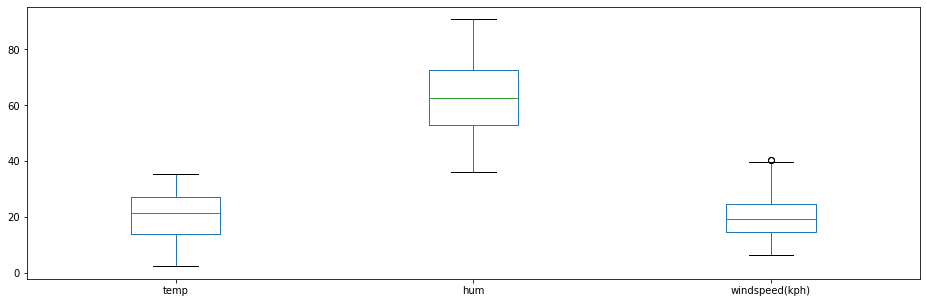

In [24]:
df_bike_no_out[['temp','hum','windspeed(kph)']].plot(kind='box', figsize = (16, 5));


In [25]:
df_mnth_week_day = pd.DataFrame(df_bike_no_out.groupby(['mnth','weekday'])['cnt'].mean())

In [26]:
df_mnth_week_day.loc[12,]

,cnt
weekday,
0,2739.888889
1,3288.625000
2,3873.142857
3,3619.666667
4,3791.250000
5,3742.444444
6,2775.285714


In [27]:
df_mnth_week_h = pd.DataFrame(df_bike_no_out.groupby(['weekday','holiday'])['cnt'].mean())
df_mnth_week_h

cnt
weekday holiday             
0       0        4282.949495
1       0        4512.632911
        1        3892.000000
2       0        4702.062500
        1        1013.000000
3       0        4632.765306
        1        7403.000000
4       0        4867.870968
        1        1495.000000
5       0        4741.177083
        1        3247.000000
6       0        4637.709677

In [28]:
df_mnth_week_h = pd.DataFrame(df_bike_no_out.groupby(['mnth','weekday','holiday'])['cnt'].mean())
df_mnth_week_h

cnt
mnth weekday holiday             
1    0       0        1657.333333
     1       0        1931.166667
             1        1749.666667
     2       0        2567.777778
     3       0        1961.857143
...                           ...
12   2       1        1013.000000
     3       0        3619.666667
     4       0        3791.250000
     5       0        3742.444444
     6       0        2775.285714

[98 rows x 1 columns]

In [39]:
df_bike_no_out.reset_index(drop = True, inplace = True)

In [40]:
from sklearn.preprocessing import Normalizer

In [41]:
scaler = Normalizer()

In [42]:
Y = df_bike_no_out.pop('cnt')

KeyError: 'cnt'

In [43]:
X = df_bike_no_out

In [44]:
x_scale = scaler.fit_transform(X)

In [45]:
x_train, x_test,y_train, y_test = tts(x_scale,Y)

In [46]:
print(x_train.shape,y_train.shape)

(504, 8) (504,)


In [47]:
print(x_test.shape,y_test.shape)

(169, 8) (169,)


In [58]:
#Modelo de regresion linear
linreg = LinReg(fit_intercept=False)

In [59]:
from  sklearn.metrics import r2_score

In [60]:
linreg.fit(x_train,y_train)

LinearRegression(fit_intercept=False)

In [61]:
y_pred = linreg.predict(x_test)

In [62]:
r2_score(y_test,y_pred)

0.54113743121439

In [63]:
#Modelo de regresion con lasso

lass = Lasso()

In [64]:
lass.fit(x_train, y_train)

Lasso()

In [65]:
y_pred = lass.predict(x_test)
r2_score(y_test,y_pred)

0.5224559656694865

In [66]:
#Modelo de regresion con Ridge

ridg = Ridge()

ridg.fit(x_train,y_train)
y_pred = ridg.predict(x_test)
r2_score(y_test,y_pred)

0.4964876362206706

In [67]:
#Modelo de regresion con elasti net

In [68]:
ela = ElasticNet()

ela.fit(x_train,y_train)
y_pred = ela.predict(x_test)
r2_score(y_test,y_pred)

0.018974650712652252

In [70]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7
0,0.048041,0.112096,0.0000,0.032027,0.016014,0.537287,0.810027,0.197542
1,0.038643,0.090168,0.0000,0.012881,0.012881,0.391694,0.894166,0.192579
2,0.026200,0.065499,0.0131,0.013100,0.000000,0.393866,0.897334,0.185315
3,0.041214,0.082428,0.0000,0.013738,0.013738,0.384421,0.904412,0.159337
4,0.043023,0.114728,0.0000,0.071705,0.014341,0.449317,0.842535,0.260553
...,...,...,...,...,...,...,...,...
499,0.016394,0.032788,0.0000,0.081970,0.016394,0.142028,0.959401,0.225932
500,0.057236,0.143091,0.0000,0.014309,0.014309,0.305559,0.928899,0.140071
501,0.024386,0.060966,0.0000,0.073159,0.000000,0.327863,0.889589,0.302446
502,0.023036,0.057590,0.0000,0.046072,0.011518,0.250679,0.955512,0.134365


In [76]:
#Guardando modelo

In [71]:
import pickle

In [73]:
pickle.dump(linreg,open('linregmodel.sav','wb'))

In [74]:
load_model= pickle.load(open('linregmodel.sav','rb'))

In [75]:
load_model.fit()

LinearRegression(fit_intercept=False)